In [36]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import io
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# para cargar el archivo .csv guardado localmente

from google.colab import files
uploaded = files.upload()

Saving series_prueba.csv to series_prueba.csv


In [5]:
pd.set_option('display.max_rows', 500)


df = pd.read_csv(io.StringIO(uploaded['series_prueba.csv'].decode('latin-1')),sep=';')
df

,Año,Mes,Interacciones
0,2019,1,25629
1,2019,2,22547
2,2019,3,26798
3,2019,4,22836
4,2019,5,24135
5,2019,6,24196
6,2019,7,26214
7,2019,8,23282
8,2019,9,19774
9,2019,10,24502


In [6]:
# Para concatenar año y mes

df['dateInt']=df['Año'].astype(str) + df['Mes'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m')
df

,Año,Mes,Interacciones,dateInt,Date
0,2019,1,25629,201901,2019-01-01
1,2019,2,22547,201902,2019-02-01
2,2019,3,26798,201903,2019-03-01
3,2019,4,22836,201904,2019-04-01
4,2019,5,24135,201905,2019-05-01
5,2019,6,24196,201906,2019-06-01
6,2019,7,26214,201907,2019-07-01
7,2019,8,23282,201908,2019-08-01
8,2019,9,19774,201909,2019-09-01
9,2019,10,24502,201910,2019-10-01


In [7]:
# Crear un índice que cuente el número de puntos temporales del más antiguo al más reciente, para usar como variable explicativa
# ID es la variable explicativa, Interacciones es la variable respuesta

df.insert(0, 'ID', range(1, len(df)+1))
df


,ID,Año,Mes,Interacciones,dateInt,Date
0,1,2019,1,25629,201901,2019-01-01
1,2,2019,2,22547,201902,2019-02-01
2,3,2019,3,26798,201903,2019-03-01
3,4,2019,4,22836,201904,2019-04-01
4,5,2019,5,24135,201905,2019-05-01
5,6,2019,6,24196,201906,2019-06-01
6,7,2019,7,26214,201907,2019-07-01
7,8,2019,8,23282,201908,2019-08-01
8,9,2019,9,19774,201909,2019-09-01
9,10,2019,10,24502,201910,2019-10-01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.124638
Kurtosis: -0.559156


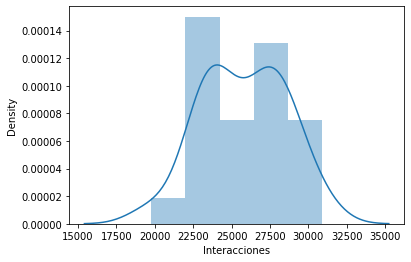

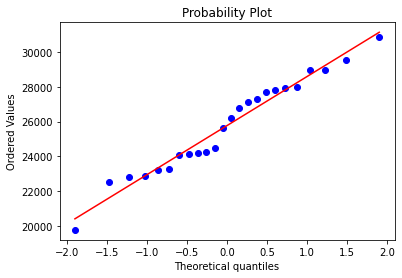

In [37]:
sns.distplot(df['Interacciones'], kde=True,);
fig = plt.figure()
res = stats.probplot(df['Interacciones'], plot=plt)
print("Skewness: %f" % df['Interacciones'].skew())
print("Kurtosis: %f" % df['Interacciones'].kurt())

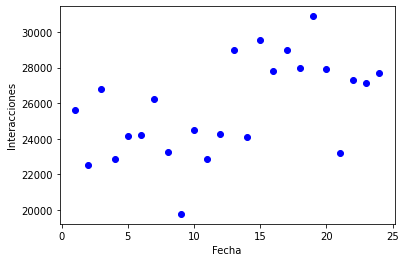

In [8]:
plt.scatter(df.ID, df.Interacciones,  color='blue')
plt.xlabel("Fecha")
plt.ylabel("Interacciones")
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [44]:
#model = LinearRegression().fit(df['dateInt'], df['Interacciones'])
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df[['ID']])
y = np.asanyarray(df[['Interacciones']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[201.99478261]]
Intercept:  [23248.98188406]


Text(0, 0.5, 'Interacciones')

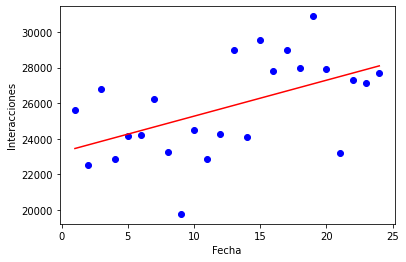

In [12]:
plt.scatter(df.ID, df.Interacciones,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Fecha")
plt.ylabel("Interacciones")

In [13]:
#Evaluación del modelo

from sklearn.metrics import r2_score

#x = np.asanyarray(df[['ID']])
#y = np.asanyarray(df[['Interacciones']])
y_hat = regr.predict(x)


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
#print("R2-score: %.2f" % r2_score(y_hat , y) )

Mean absolute error: 1847.74
Residual sum of squares (MSE): 5211229.83
R2-score: -1.67


In [21]:
# R cuadrado
print(f'R Squared: {regr.fit (x, y).score(x,y)}')

R Squared: 0.27281652695627745


El valor del intercepto o beta 0 es de 23249 y el valor de la pendiente o beta 1 es de 201.99, el del R^2 es de 0.2728

In [74]:
# Hacer predicciones

x=[25,26,27]

X_test = np.array(x).reshape(-1, 1)
y_pred = regr.predict(X_test)
y_pred

array([[28298.85144928],
       [28500.84623188],
       [28702.84101449]])

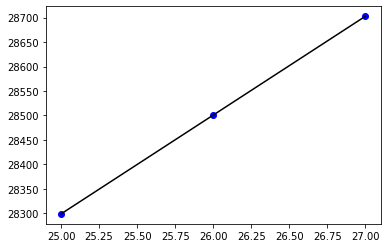

In [76]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_pred, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

In [89]:
data = [['25', 28298.85144928], ['26', 28500.84623188], ['27', 28702.84101449]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Fecha', 'Interacciones']) 
df['Fecha'] = df['Fecha'].astype(object)
df


,Fecha,Interacciones
0,25,28298.851449
1,26,28500.846232
2,27,28702.841014


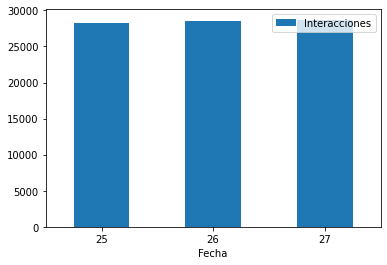

In [93]:
df.plot.bar(x='Fecha', y='Interacciones', rot=0)